<a href="https://colab.research.google.com/github/amilkh/Evil-Telco-Scripts/blob/master/ck%2B_to_png.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# https://github.com/ifp-uiuc/do-neural-networks-learn-faus-iccvw-2015/tree/master/data_scripts
! git clone https://github.com/ifp-uiuc/do-neural-networks-learn-faus-iccvw-2015.git

In [0]:
! rm -rf ck+ && mkdir ck+
! unzip -q '/content/drive/My Drive/cs230 project/dataset/ck+/extended-cohn-kanade-images.zip' -d /content/ck+
! unzip -q '/content/drive/My Drive/cs230 project/dataset/ck+/FACS_labels.zip' -d /content/ck+
! unzip -q '/content/drive/My Drive/cs230 project/dataset/ck+/Emotion_labels.zip' -d /content/ck+
! mv '/content/ck+/Emotion'{,_labels}

In [0]:
# These folders give some processing issue, so we delete them
! rm -rf ck+/cohn-kanade-images/S5*

In [30]:
! rm -rf ck-output && mkdir ck-output
! python2 do-neural-networks-learn-faus-iccvw-2015/data_scripts/make_ck_plus_dataset.py --input_path /content/ck+/ --save_path /content/ck-output


                Extended Cohn-Kanade Dataset Manager              

Condensed Dataset detected.
Removing it.
Copying original dataset to new condensed dataset path.

Condensing CK+ Dataset: 
255 empty sequences to be removed.

Removing image sequence folders that have no label.
There are 11 mismatched files.

Removing empty label folders.

Keeping only the first and last three images in each sequence.
Processing:  /content/ck-output/cohn-kanade-images/S005
Processing:  /content/ck-output/cohn-kanade-images/S010
Processing:  /content/ck-output/cohn-kanade-images/S011
Processing:  /content/ck-output/cohn-kanade-images/S014
Processing:  /content/ck-output/cohn-kanade-images/S022
Processing:  /content/ck-output/cohn-kanade-images/S026
Processing:  /content/ck-output/cohn-kanade-images/S028
Processing:  /content/ck-output/cohn-kanade-images/S029
Processing:  /content/ck-output/cohn-kanade-images/S032
Processing:  /content/ck-output/cohn-kanade-images/S034
Processing:  /content/ck-output/co

In [32]:
! ls ck-output/npy_files

folds.npy  subjs.npy  X.npy  y.npy


In [0]:
def reindex_labels(y):
    label_mapping = {1: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5}
    for label in label_mapping.keys():
        y[y == label] = label_mapping[label]

    return y

In [0]:
import numpy as np

X = np.load('/content/ck-output/npy_files/X.npy')
y8 = np.load('/content/ck-output/npy_files/y.npy')
y = reindex_labels(y8)

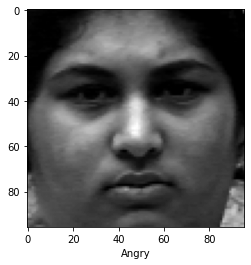

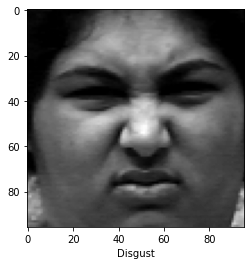

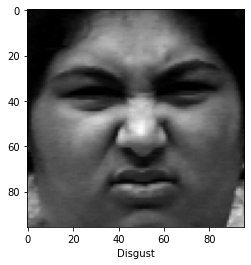

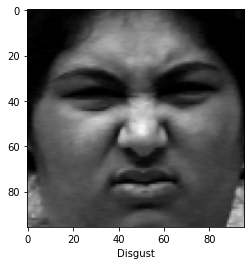

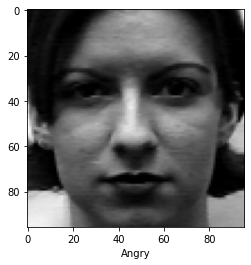

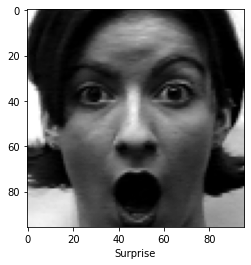

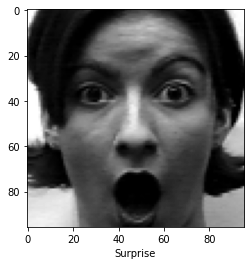

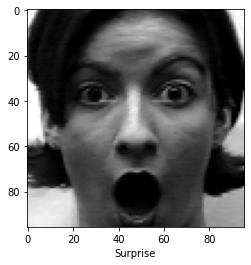

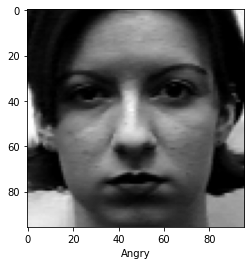

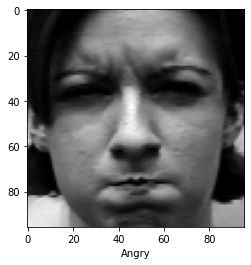

<Figure size 432x288 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt

emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

for i in range(0,10):
  plt.xlabel(emotions[y[i]])
  plt.imshow(X[i].reshape(96,96),cmap='gray')
  plt.figure()

In [0]:
# TODO: output_img_size = (96, 96) => 48,48
